利用GPT大型模型工具完成数据洞察  
本周以及下周的实验内容如下：  
请同学们参考《GPT数据科学系列课程实验手册》内容，并结合之前的作业经验，对截至2024年8月底在GitHub上具有协作行为日志数据的用户的个人信息（包括姓名、公司、邮箱及其地理位置等）进行数据洞察分析。数据获取链接为：https://github.com/X-lab2017/dase-2024-autumn/tree/main/HomeWork/data/user_data  

实验目标  
培养数据处理与分析能力：通过实际操作，提升对大规模数据集的处理和分析能力。  
掌握GPT工具的应用：学习如何利用GPT大型模型工具辅助完成数据洞察任务。  
理解数据隐私与伦理：在处理包含个人信息的数据时，遵循数据隐私保护的原则和规范。  
实验内容  
人口统计分析  
国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。  
城市级别分布：分析主要城市的开发者密度，发现技术热点区域。  
时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。  
协作行为分析  
提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。  
其他维度有趣的洞察（至少2个）  
提交内容  
数据分析代码。  
最终的数据洞察报告（PDF格式）。  


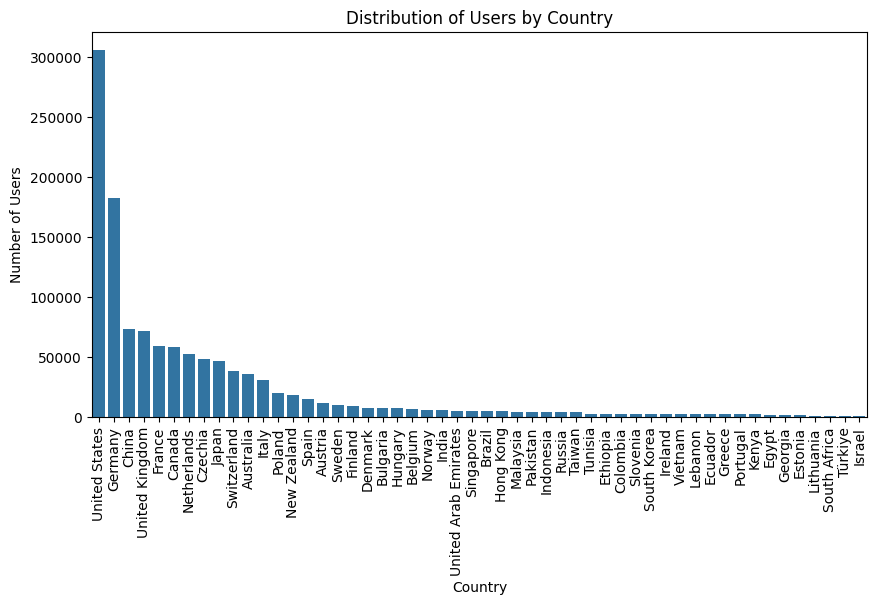

country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Canada             58600
Netherlands        52367
Czechia            48122
Japan              46553
Switzerland        38093
Name: count, dtype: int64
location
Germany          107747
Prague            37757
Japan             26986
Palo Alto, CA     19215
UK                17789
NYC               16381
San Francisco     16271
Paris, France     16021
Switzerland       15555
Houston, TX       15449
Name: count, dtype: int64


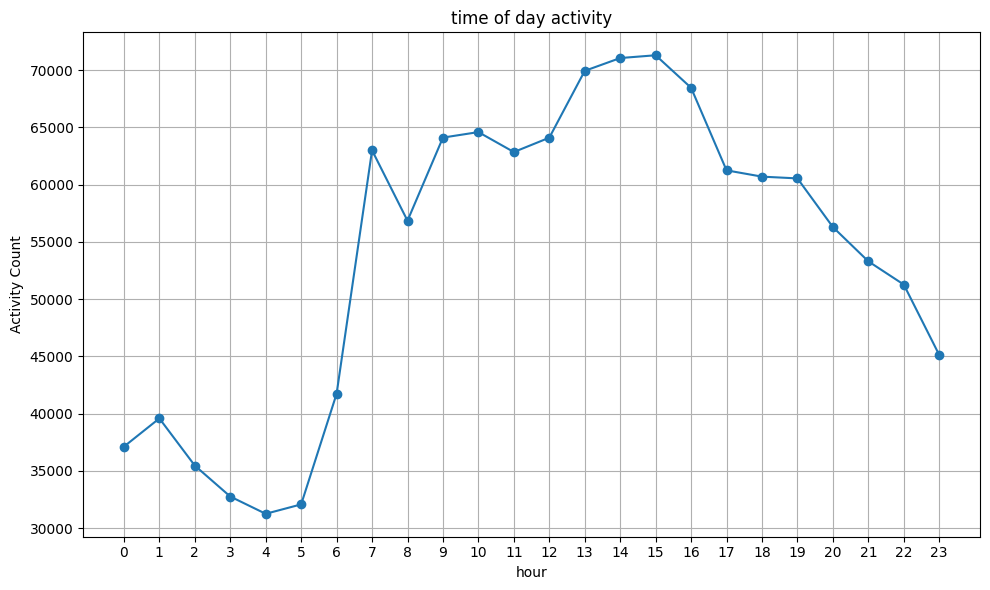

user_id
158862      37960
11146458    36400
28706372    30616
1580956     20300
40306929    19215
43724913    14505
9824526     12905
50149701    12704
195327      11218
663432      10764
Name: count, dtype: int64
user_id
4560679     750
999278      743
6379399     650
3162115     644
39504233    635
62625502    621
1609022     599
1133777     582
3238291     485
814283       75
Name: count, dtype: int64


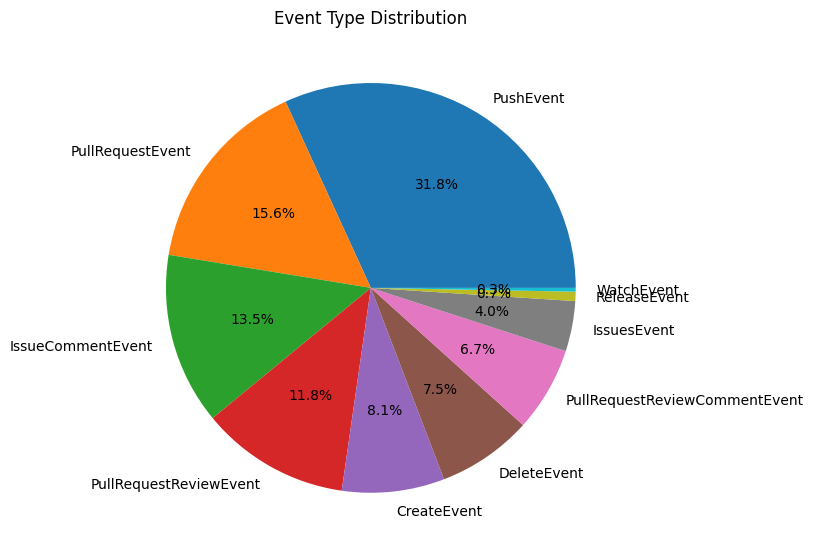

Correlation between influence score and submission count: 0.009447078345001556


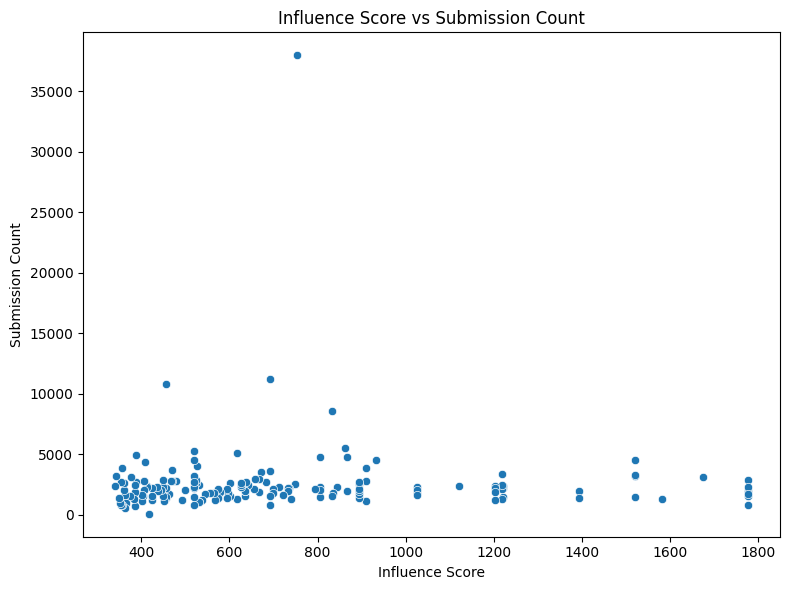

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('users_combined_info_500.csv')
# 国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。  
# 城市级别分布：分析主要城市的开发者密度，发现技术热点区域。 
country_counts = df['country'].value_counts()
top_10_countries = country_counts[:10]
location_counts = df['location'].value_counts()
top_10_locations = location_counts[:10]
# 绘制柱状图
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Country')
plt.show()
# 打印主要国家与城市
print(top_10_countries)
print(top_10_locations)

# 分析用户的活动时间分布，了解一天中哪个时间段用户最活跃。
from dateutil import parser
# 定义一个函数来解析时间戳并提取小时信息
def extract_hour(event_time):
    parsed_time = parser.parse(event_time)
    return parsed_time.hour
# 应用函数提取小时信息
df['hour'] = df['event_time'].apply(extract_hour)
# 统计每个时间段的活动次数
hourly_activity = df['hour'].value_counts().sort_index()
# 绘制折线图
plt.figure(figsize=(10, 6))
hourly_activity.plot(kind='line', marker='o')
plt.title('time of day activity')
plt.xlabel('hour')
plt.ylabel('Activity Count')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

# 识别并打印高活跃用户和低活跃用户。
submission_counts = df['user_id'].value_counts()
top_10_active_users = submission_counts[:10]
low_10_active_users = submission_counts[-10:]
print(top_10_active_users)
print(low_10_active_users)

# 分析不同类型的活动的分布情况，了解哪种类型的活动最常见。
event_type_counts = df['event_type'].value_counts()
event_type_counts = event_type_counts[:10]
# 绘制饼图
plt.figure(figsize=(8, 8))
event_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Event Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 分析用户影响力得分与提交次数的关系
influence_scores = df['total_influence']
submission_counts = df['user_id'].value_counts()
correlation = influence_scores.corr(submission_counts)
print(f'Correlation between influence score and submission count: {correlation}')
# 绘制散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x=influence_scores, y=submission_counts)
plt.title('Influence Score vs Submission Count')
plt.xlabel('Influence Score')
plt.ylabel('Submission Count')
plt.tight_layout()
plt.show()

